Code repurposed from Kaggle [https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-cryptocurrencies]

## import dependencies

In [1]:
import pandas as pd
import pandas_datareader as web
import numpy as np
from pathlib import Path
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

from yahoo_fin.stock_info import get_data

%matplotlib inline

## load and inspect data

In [2]:
crypto_currency = 'AAVE'
against_currency = 'USD'

start = dt.datetime(2019,1,1)
end = dt.datetime.now()

base_df = get_data(f'{crypto_currency}-{against_currency}', start, end, index_as_date = True, interval = '1d')
base_df

,open,high,low,close,adjclose,volume,ticker
2021-03-31,377.183685,385.298737,369.995331,377.611786,377.611786,342371946,AAVE-USD
2021-04-01,377.514648,408.479919,374.290924,406.692291,406.692291,480081712,AAVE-USD
2021-04-02,406.883606,411.377075,385.415894,385.420563,385.420563,395544800,AAVE-USD
2021-04-03,385.526978,409.579529,382.788849,404.309723,404.309723,330959728,AAVE-USD
2021-04-04,404.392944,407.329315,388.300354,397.924561,397.924561,306918909,AAVE-USD
...,...,...,...,...,...,...,...
2021-07-23,289.827515,299.094971,281.970612,288.394989,288.394989,315739452,AAVE-USD
2021-07-24,287.886322,292.688171,272.336395,287.970825,287.970825,273484723,AAVE-USD
2021-07-25,288.150696,335.344971,286.235596,303.317261,303.317261,737409767,AAVE-USD
2021-07-26,302.859161,312.280243,285.575592,300.003143,300.003143,505524169,AAVE-USD


In [3]:
base_df['spread'] = base_df.high - base_df.low
base_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119 entries, 2021-03-31 to 2021-07-27
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   open      119 non-null    float64
 1   high      119 non-null    float64
 2   low       119 non-null    float64
 3   close     119 non-null    float64
 4   adjclose  119 non-null    float64
 5   volume    119 non-null    int64  
 6   ticker    119 non-null    object 
 7   spread    119 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 8.4+ KB


## Plot the closing value of aave over time

Text(0.5, 1.0, 'Closing price distribution of AAVE')

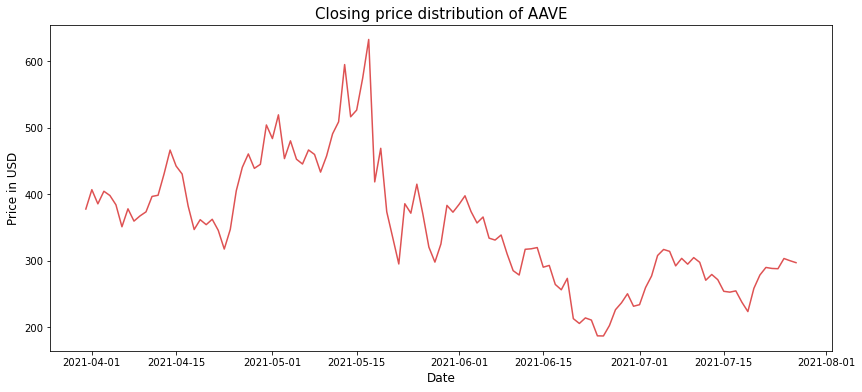

In [4]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(14,6))

sns.lineplot(y = base_df.close.values, x=base_df.index.values, alpha=0.8, color=color[3])
ax.xaxis.set_major_locator(mdates.AutoDateLocator())

plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.title("Closing price distribution of AAVE", fontsize=15)

Text(0.5, 1.0, 'Daily price spread of AAVE')

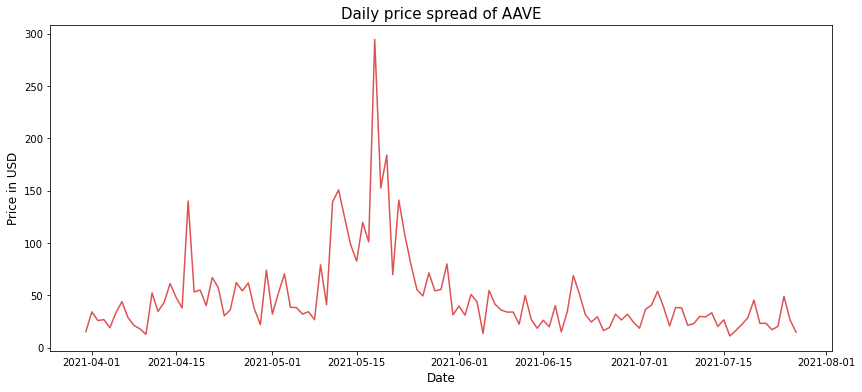

In [5]:
fig, ax = plt.subplots(figsize=(14,6))

sns.lineplot(y = base_df.spread.values, x=base_df.index.values, alpha=0.8, color=color[3])
ax.xaxis.set_major_locator(mdates.AutoDateLocator())

plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.title("Daily price spread of AAVE", fontsize=15)

## Candlestick chart

In [6]:
import matplotlib.ticker as mticker
import mplfinance as mpf

temp_base_df = base_df.copy(deep=False)

temp_base_df = temp_base_df.drop(['spread'], axis=1)
temp_base_df

,open,high,low,close,adjclose,volume,ticker
2021-03-31,377.183685,385.298737,369.995331,377.611786,377.611786,342371946,AAVE-USD
2021-04-01,377.514648,408.479919,374.290924,406.692291,406.692291,480081712,AAVE-USD
2021-04-02,406.883606,411.377075,385.415894,385.420563,385.420563,395544800,AAVE-USD
2021-04-03,385.526978,409.579529,382.788849,404.309723,404.309723,330959728,AAVE-USD
2021-04-04,404.392944,407.329315,388.300354,397.924561,397.924561,306918909,AAVE-USD
...,...,...,...,...,...,...,...
2021-07-23,289.827515,299.094971,281.970612,288.394989,288.394989,315739452,AAVE-USD
2021-07-24,287.886322,292.688171,272.336395,287.970825,287.970825,273484723,AAVE-USD
2021-07-25,288.150696,335.344971,286.235596,303.317261,303.317261,737409767,AAVE-USD
2021-07-26,302.859161,312.280243,285.575592,300.003143,300.003143,505524169,AAVE-USD


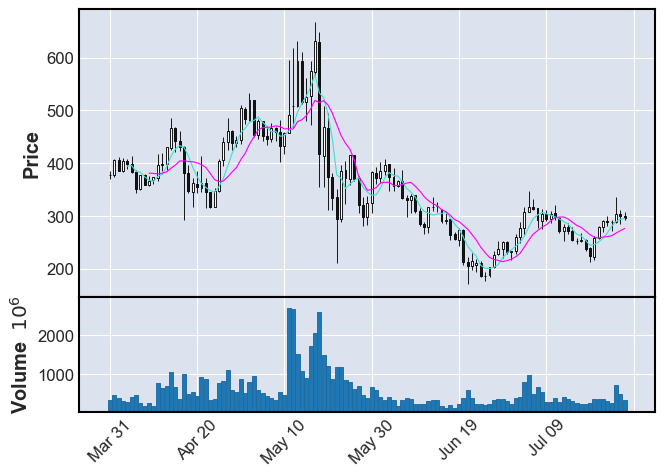

In [7]:
mpf.plot(temp_base_df, type='candle', mav=(5,10), volume=True)

## Future Price Prediction

In [8]:
from fbprophet import Prophet

In [9]:
price_predict_df = base_df['close'].copy(deep=False).reset_index()
price_predict_df.columns = ["ds", "y"]
price_predict_df = price_predict_df[price_predict_df['ds']>'2020-1-1']
price_predict_df

,ds,y
0,2021-03-31,377.611786
1,2021-04-01,406.692291
2,2021-04-02,385.420563
3,2021-04-03,404.309723
4,2021-04-04,397.924561
...,...,...
114,2021-07-23,288.394989
115,2021-07-24,287.970825
116,2021-07-25,303.317261
117,2021-07-26,300.003143


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
134,2021-08-12,295.690511,206.079818,384.101428
135,2021-08-13,289.693451,186.228961,391.391526
136,2021-08-14,295.785695,191.534432,404.437513
137,2021-08-15,307.888224,194.050655,429.071604
138,2021-08-16,308.368698,181.694508,431.034062


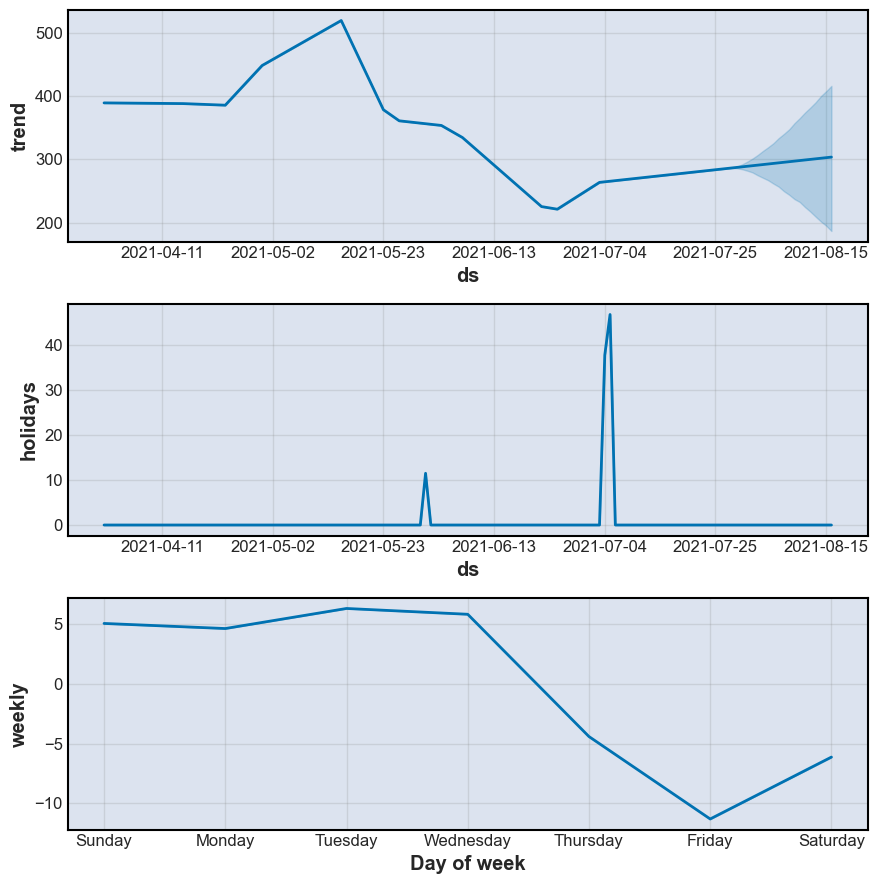

In [10]:
m = Prophet(changepoint_prior_scale=.7)
m.add_country_holidays(country_name='US')
m.fit(price_predict_df);
m.train_holiday_names

future = m.make_future_dataframe(periods=20)

forecast = m.predict(future)
fig = m.plot_components(forecast)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

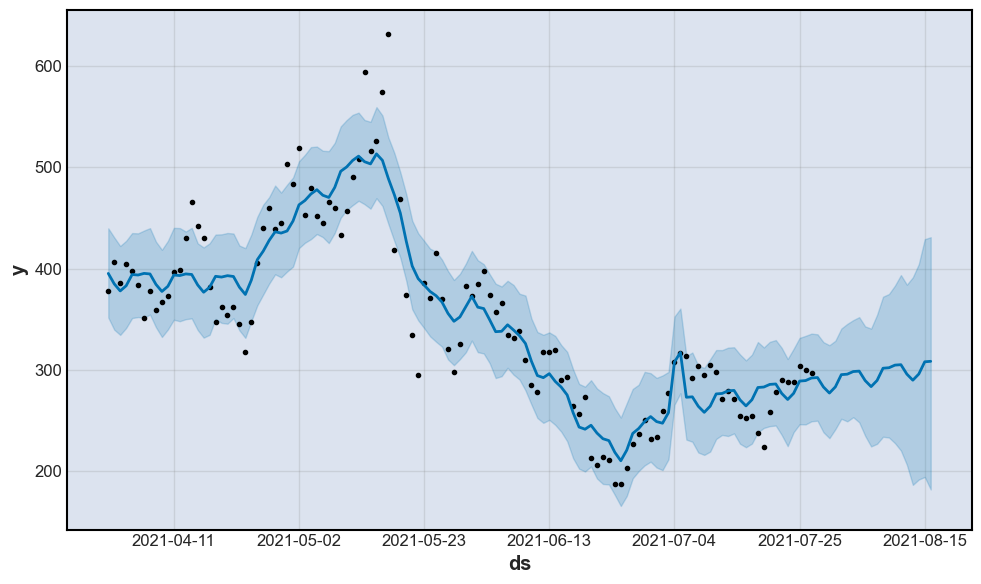

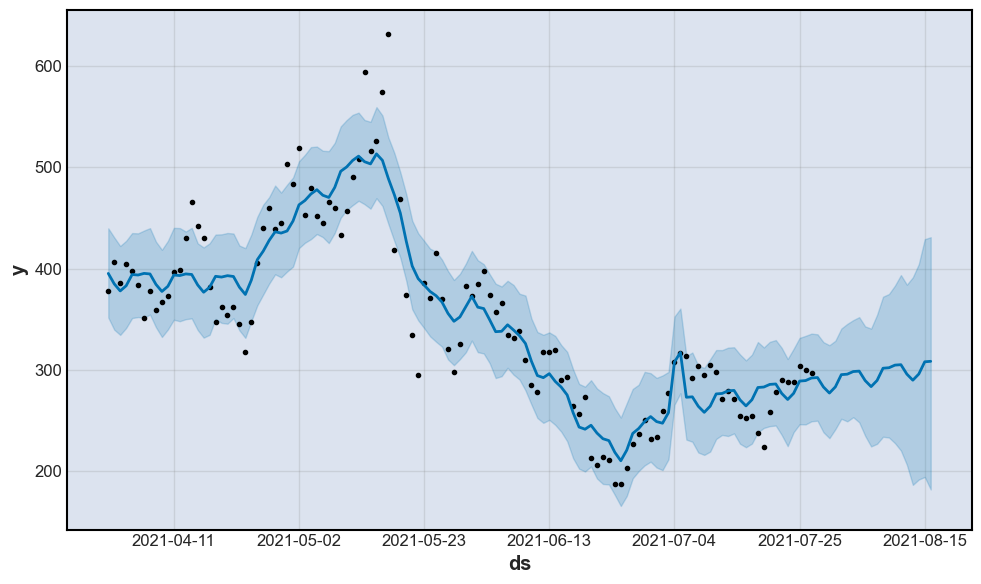

In [11]:
m.plot(forecast)